### **Black-Scholes Pricing and Greeks Visualization**
This notebook demonstrates the use of the `black_scholes.py` module to price European options and visualize their Greeks.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys
import os
from pathlib import Path

# Add the parent directory to Python path to import our modules
current_dir = Path.cwd()
project_root = current_dir.parent if current_dir.name != 'notebooks' else current_dir
sys.path.append(str(project_root))

print(f"Project root: {project_root}")
print(f"Python path: {sys.path[-1]}")

# Try importing
try:
    from pricing.black_scholes import bs_price, bs_greeks
    print("✅ Successfully imported bs_price and bs_greeks")
except ImportError as e:
    print(f"❌ Import error: {e}")
    # Let's see what's available
    try:
        import pricing.black_scholes as bs_mod
        print("Available in module:", [x for x in dir(bs_mod) if not x.startswith('_')])
    except ImportError as e2:
        print(f"❌ Couldn't import module: {e2}")

Project root: /home/timothykimutai/options-pricing-engine/notebooks
Python path: /home/timothykimutai/options-pricing-engine/notebooks
✅ Successfully imported bs_price and bs_greeks


#### 1. Basic Option Pricing

Let's define some parameters for a sample option and calculate its price and Greeks.

In [14]:
S = 100    # Current stock price
K = 105    # Strike price
T = 1.0    # Time to maturity (1 year)
r = 0.05   # Risk-free rate
sigma = 0.2 # Volatility

call_price = bs_price(S, K, T, r, sigma, 'call')
put_price = bs_price(S, K, T, r, sigma, 'put')
greeks = bs_greeks(S, K, T, r, sigma, 'call')

print(f"Call Price: {call_price:.4f}")
print(f"Put Price: {put_price:.4f}")
print("\nGreeks for the Call Option:")
for greek, value in greeks.items():
    print(f"  {greek.capitalize()}: {value:.4f}")

Call Price: 8.0214
Put Price: 7.9004

Greeks for the Call Option:
  Delta: 0.5422
  Gamma: 0.0198
  Vega: 0.3967
  Theta: -0.0172
  Rho: 0.4620


#### 2. Visualizing the Price Surface

Let's see how the option price changes with respect to the stock price and time to maturity.

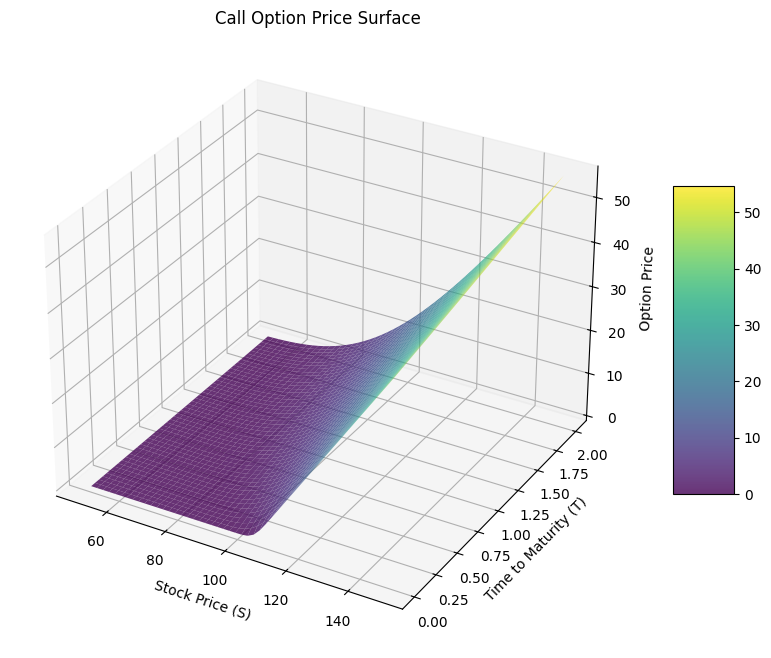

In [15]:
stock_prices = np.linspace(50, 150, 50)
times_to_maturity = np.linspace(0.01, 2, 50)
S_grid, T_grid = np.meshgrid(stock_prices, times_to_maturity)

# Vectorize the pricing function
vectorized_bs_price = np.vectorize(bs_price)
call_prices = vectorized_bs_price(S_grid, K, T_grid, r, sigma, 'call')

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(S_grid, T_grid, call_prices, cmap='viridis', alpha=0.8)

ax.set_title('Call Option Price Surface')
ax.set_xlabel('Stock Price (S)')
ax.set_ylabel('Time to Maturity (T)')
ax.set_zlabel('Option Price')
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=5)
plt.show()

#### 3. Visualizing the Greeks

Now let's plot the main Greeks (Delta, Gamma, Vega, Theta) as a function of the stock price.

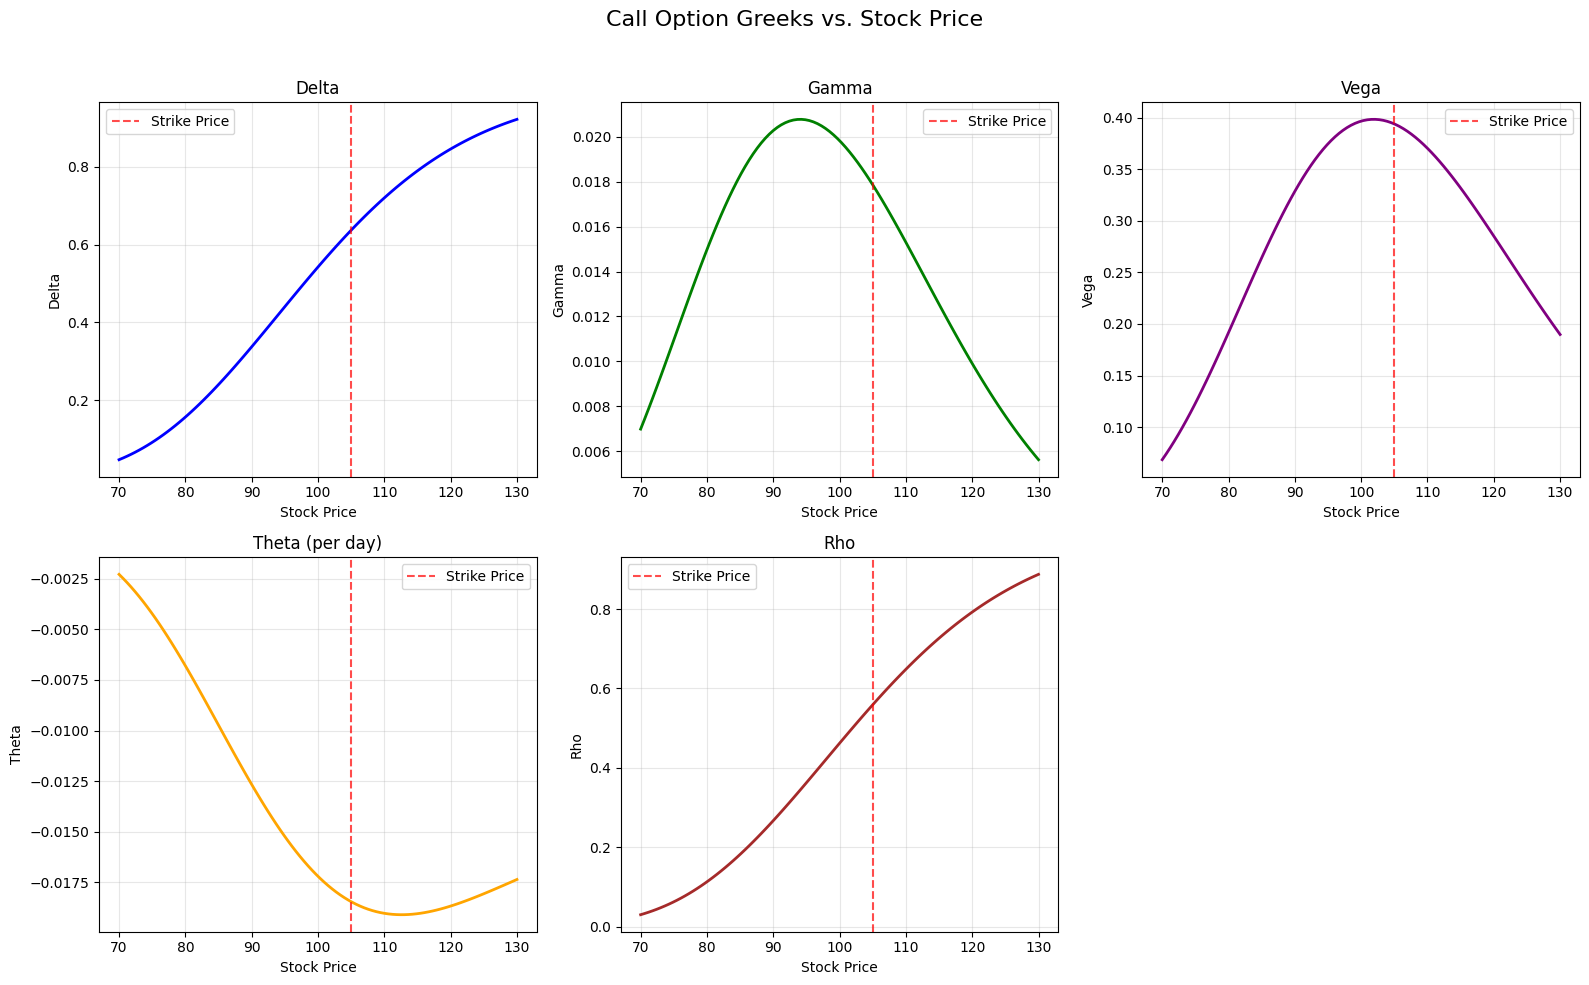

In [16]:
stock_prices_range = np.linspace(70, 130, 100)
greeks_list = [bs_greeks(s, K, T, r, sigma, 'call') for s in stock_prices_range]

delta_vals = [g['delta'] for g in greeks_list]
gamma_vals = [g['gamma'] for g in greeks_list]
vega_vals = [g['vega'] for g in greeks_list]
theta_vals = [g['theta'] for g in greeks_list]
rho_vals = [g['rho'] for g in greeks_list]

fig, axs = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Call Option Greeks vs. Stock Price', fontsize=16)

# Delta
axs[0, 0].plot(stock_prices_range, delta_vals, 'b-', linewidth=2)
axs[0, 0].set_title('Delta')
axs[0, 0].set_xlabel('Stock Price')
axs[0, 0].set_ylabel('Delta')
axs[0, 0].grid(True, alpha=0.3)
axs[0, 0].axvline(K, color='r', linestyle='--', alpha=0.7, label='Strike Price')
axs[0, 0].legend()

# Gamma
axs[0, 1].plot(stock_prices_range, gamma_vals, 'g-', linewidth=2)
axs[0, 1].set_title('Gamma')
axs[0, 1].set_xlabel('Stock Price')
axs[0, 1].set_ylabel('Gamma')
axs[0, 1].grid(True, alpha=0.3)
axs[0, 1].axvline(K, color='r', linestyle='--', alpha=0.7, label='Strike Price')
axs[0, 1].legend()

# Vega
axs[0, 2].plot(stock_prices_range, vega_vals, 'purple', linewidth=2)
axs[0, 2].set_title('Vega')
axs[0, 2].set_xlabel('Stock Price')
axs[0, 2].set_ylabel('Vega')
axs[0, 2].grid(True, alpha=0.3)
axs[0, 2].axvline(K, color='r', linestyle='--', alpha=0.7, label='Strike Price')
axs[0, 2].legend()

# Theta
axs[1, 0].plot(stock_prices_range, theta_vals, 'orange', linewidth=2)
axs[1, 0].set_title('Theta (per day)')
axs[1, 0].set_xlabel('Stock Price')
axs[1, 0].set_ylabel('Theta')
axs[1, 0].grid(True, alpha=0.3)
axs[1, 0].axvline(K, color='r', linestyle='--', alpha=0.7, label='Strike Price')
axs[1, 0].legend()

# Rho
axs[1, 1].plot(stock_prices_range, rho_vals, 'brown', linewidth=2)
axs[1, 1].set_title('Rho')
axs[1, 1].set_xlabel('Stock Price')
axs[1, 1].set_ylabel('Rho')
axs[1, 1].grid(True, alpha=0.3)
axs[1, 1].axvline(K, color='r', linestyle='--', alpha=0.7, label='Strike Price')
axs[1, 1].legend()

# Hide the empty subplot
axs[1, 2].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### 4. Additional Analysis: Implied Volatility Surface (Basic)
Let's see how volatility affects option prices

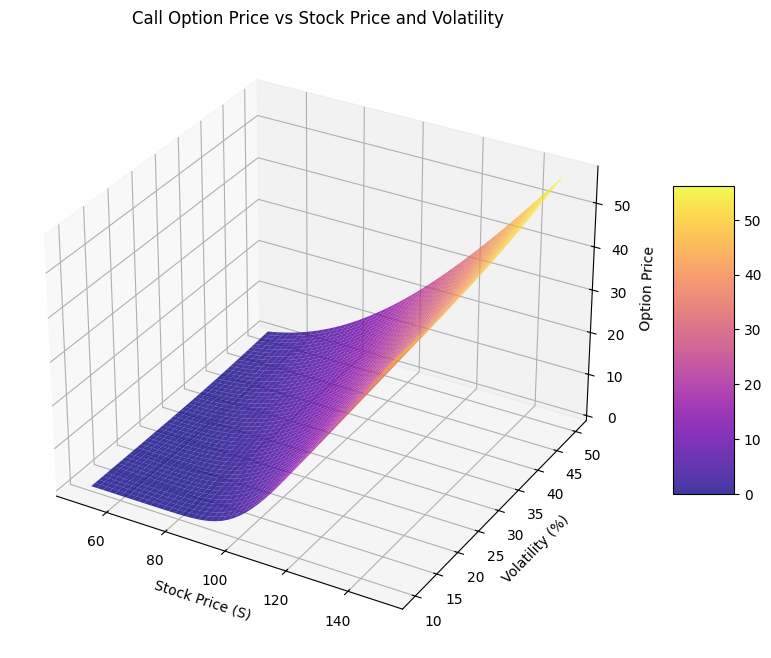

In [17]:
volatilities = np.linspace(0.1, 0.5, 50)
S_vol, vol_grid = np.meshgrid(stock_prices, volatilities)

call_prices_vol = vectorized_bs_price(S_vol, K, T, r, vol_grid, 'call')

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(S_vol, vol_grid * 100, call_prices_vol, cmap='plasma', alpha=0.8)

ax.set_title('Call Option Price vs Stock Price and Volatility')
ax.set_xlabel('Stock Price (S)')
ax.set_ylabel('Volatility (%)')
ax.set_zlabel('Option Price')
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=5)
plt.show()